# Analysys notebook 2
This notebook contains the report of the analysis of the full dataset, which includes the NLP part of the project.


In [1]:
# Set warnings off
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load dataset
df = pd.read_csv("../dataset/guardian_headlines_2019_2025_processed.csv")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

In [4]:
df.head()

,date,idx,n_headlines_day,authors,headline,topics,year,gender,sentiment,sentiment_score,month,day_of_week
0,2019-01-01,1,22,No author found,Asia and Australia usher in new year with huge...,"World news,New year,Hong Kong,Taiwan,South Kor...",2019,No name provided,POSITIVE,0.999702,1,1
1,2019-01-01,2,22,No author found,"Identity, culture and definitions of Jewishness","Judaism,Religion,World news,Race,Jean-Paul Sar...",2019,No name provided,POSITIVE,0.996458,1,1
2,2019-01-01,3,22,No author found,The messy history of first-wave feminism,"Feminism,Emmeline Pankhurst,Women in politics,...",2019,No name provided,NEGATIVE,0.993136,1,1
3,2019-01-01,4,22,No author found,The Foreign Office did not have a hand in my r...,"Iran,Middle East and north Africa,Yemen,Saudi ...",2019,No name provided,NEGATIVE,0.999457,1,1
4,2019-01-01,5,22,Akshata Rao,Tower block collapse in Russia leaves four dea...,"Russia,Europe,World news",2019,unknown,NEGATIVE,0.999395,1,1


In [5]:
# Assign a sign to the sentiment
# Replace POSITIVE by +1 and NEGATIVE by -1
df['sentiment_signed'] = df['sentiment'].replace(['POSITIVE', 'NEGATIVE'], [1, -1])

df['sentiment_score_signed'] = df['sentiment_score'] * df['sentiment_signed']
df.head(10)

,date,idx,n_headlines_day,authors,headline,topics,year,gender,sentiment,sentiment_score,month,day_of_week,sentiment_signed,sentiment_score_signed
0,2019-01-01,1,22,No author found,Asia and Australia usher in new year with huge...,"World news,New year,Hong Kong,Taiwan,South Kor...",2019,No name provided,POSITIVE,0.999702,1,1,1,0.999702
1,2019-01-01,2,22,No author found,"Identity, culture and definitions of Jewishness","Judaism,Religion,World news,Race,Jean-Paul Sar...",2019,No name provided,POSITIVE,0.996458,1,1,1,0.996458
2,2019-01-01,3,22,No author found,The messy history of first-wave feminism,"Feminism,Emmeline Pankhurst,Women in politics,...",2019,No name provided,NEGATIVE,0.993136,1,1,-1,-0.993136
3,2019-01-01,4,22,No author found,The Foreign Office did not have a hand in my r...,"Iran,Middle East and north Africa,Yemen,Saudi ...",2019,No name provided,NEGATIVE,0.999457,1,1,-1,-0.999457
4,2019-01-01,5,22,Akshata Rao,Tower block collapse in Russia leaves four dea...,"Russia,Europe,World news",2019,unknown,NEGATIVE,0.999395,1,1,-1,-0.999395
5,2019-01-01,6,22,No author found,Letter: John Large obituary,"Nuclear weapons,Local government",2019,No name provided,NEGATIVE,0.968999,1,1,-1,-0.968999
6,2019-01-01,7,22,Angela Giuffrida,Venice to charge day-trippers up to €10 to ent...,"Italy,Venice holidays,Europe,Travel,World news",2019,female,POSITIVE,0.973805,1,1,1,0.973805
7,2019-01-01,8,22,No author found,Four dead and 40 missing after Russian tower b...,"Russia,Europe,World news",2019,No name provided,NEGATIVE,0.997743,1,1,-1,-0.997743
8,2019-01-01,9,22,Oliver Holmes,Palestinian man jailed for 18 years after kill...,"Israel,Middle East and north Africa,World news...",2019,male,NEGATIVE,0.955065,1,1,-1,-0.955065
9,2019-01-01,10,22,Madlen Davies,"Palestinian superbug epidemic could spread, sa...","Gaza,Middle East and north Africa,Palestinian ...",2019,female,NEGATIVE,0.993764,1,1,-1,-0.993764


## Gender


Text(0.5, 0.98, 'Gender Ratio in News')

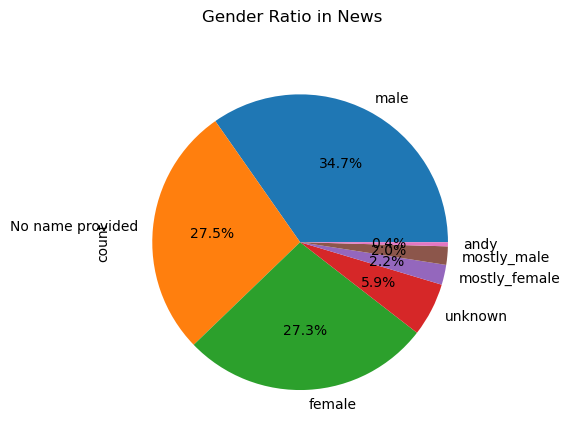

In [6]:
# Pie of gender ratio
fig, ax = plt.subplots()
df["gender"].value_counts().plot.pie(autopct='%1.1f%%')
fig.suptitle("Gender Ratio in News")

Text(0.5, 0.98, 'Gender Ratio in News')

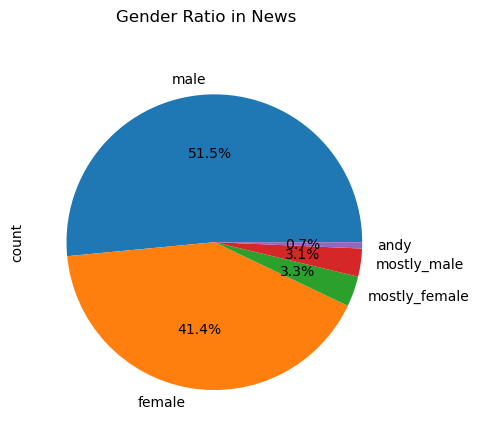

In [7]:
# Drop columns with value "No name provided" or "unknown"
df_gender = df
# drop rows with value "No name provided" or "unknown" in column "gender"
df_gender["gender"].replace("No name provided", np.nan, inplace=True)
df_gender["gender"].replace("unknown", np.nan, inplace=True)
df_gender.dropna(inplace=True)
fig, ax = plt.subplots()
df_gender["gender"].value_counts().plot.pie(autopct='%1.1f%%')
# fig add title
fig.suptitle("Gender Ratio in News")

Which percentage of women write the most important news of the day?


<Axes: ylabel='count'>

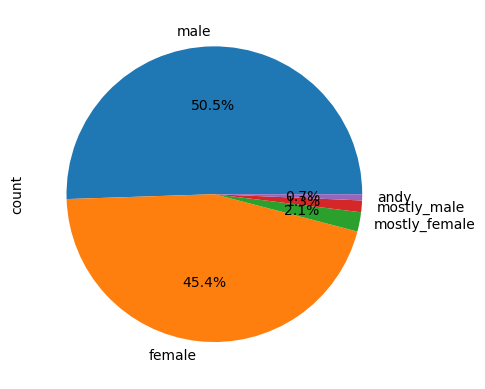

In [8]:
df_gender["gender"][df_gender["idx"]==1].value_counts().plot.pie(autopct='%1.1f%%')

And the top 5?

<Axes: ylabel='count'>

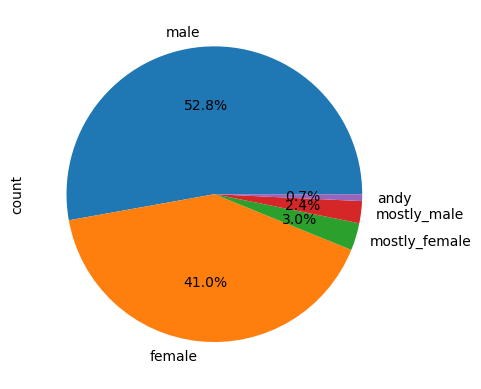

In [9]:
df_gender["gender"][df_gender["idx"]<6].value_counts().plot.pie(autopct='%1.1f%%')

And the top 10?

<Axes: ylabel='count'>

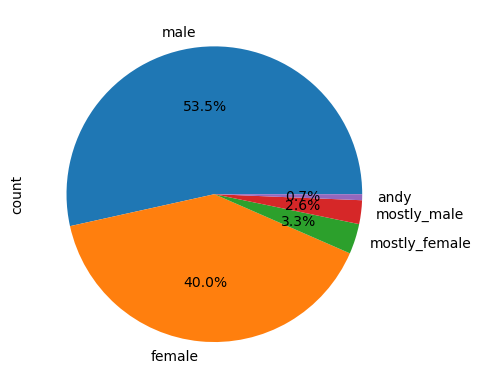

In [10]:
df_gender["gender"][df_gender["idx"]<11].value_counts().plot.pie(autopct='%1.1f%%')

In [11]:
from ipywidgets import interact

In [18]:
def plot_pie(first_n_articles):
    """
    Function to plot a pie chart based on the first_n_articles.
    """
    # Filter the dataframe for the given first_n_articles and plot the pie chart
    filtered_data = df_gender[df_gender["idx"] <= first_n_articles]
    gender_counts = filtered_data["gender"].value_counts()

    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    gender_counts.plot.pie(autopct='%1.1f%%')
    plt.title(f"Gender Distribution for first articles={first_n_articles}")
    plt.ylabel("")  # Remove the ylabel
    plt.show()

# Create the slider to interact with the plot
interact(plot_pie, first_n_articles=(1, 40, 1))

interactive(children=(IntSlider(value=20, description='first_n_articles', max=40, min=1), Output()), _dom_clas…

<function __main__.plot_pie(first_n_articles)>

In [74]:
def plot_gender_pie_by_year(year):
    """
    Function to plot a pie chart based on the year.
    """
    # Filter the dataframe for the given year and plot the pie chart
    filtered_data = df[df["year"] == year]
    gender_counts = filtered_data["gender"].value_counts()

    # Plot the pie chart
    fig, ax = plt.subplots(figsize=(6, 6))
    gender_counts.plot.pie(autopct='%1.1f%%', ax=ax)
    ax.set_title(f"Gender Distribution for year={year}")
    ax.set_ylabel("")  # Remove the ylabel
    plt.show()



In [75]:
interact(plot_gender_pie_by_year, year=(2019, 2024, 1))


interactive(children=(IntSlider(value=2021, description='year', max=2024, min=2019), Output()), _dom_classes=(…

<function __main__.plot_gender_pie_by_year(year)>

Who do the headlines talk about? Are they mostly men?

Is the sentiment of the headline different depending on the author gender?

In [22]:
gender_sentiment = df.groupby(by="gender")["sentiment_signed"].mean()[["female", "male"]].sort_values(ascending=True)
gender_sentiment

gender
male     -0.514010
female   -0.471363
Name: sentiment_signed, dtype: float64

Text(0.5, 0.98, 'Sentiment mean by gender')

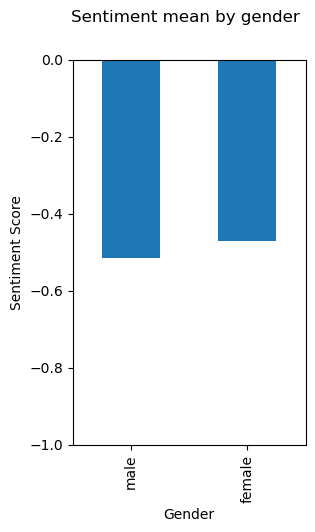

In [26]:
fig, ax = plt.subplots(figsize=(3, 5))
gender_sentiment.plot.bar(ax=ax)
ax.set_ylabel("Sentiment Score")
ax.set_xlabel("Gender")
ax.set_ylim(-1, 0)
fig.suptitle("Sentiment mean by gender")


## Pandemic

Which effects did the Covid-19 pandemic have in the headlines sentiment?

Text(0.5, 0, 'Date')

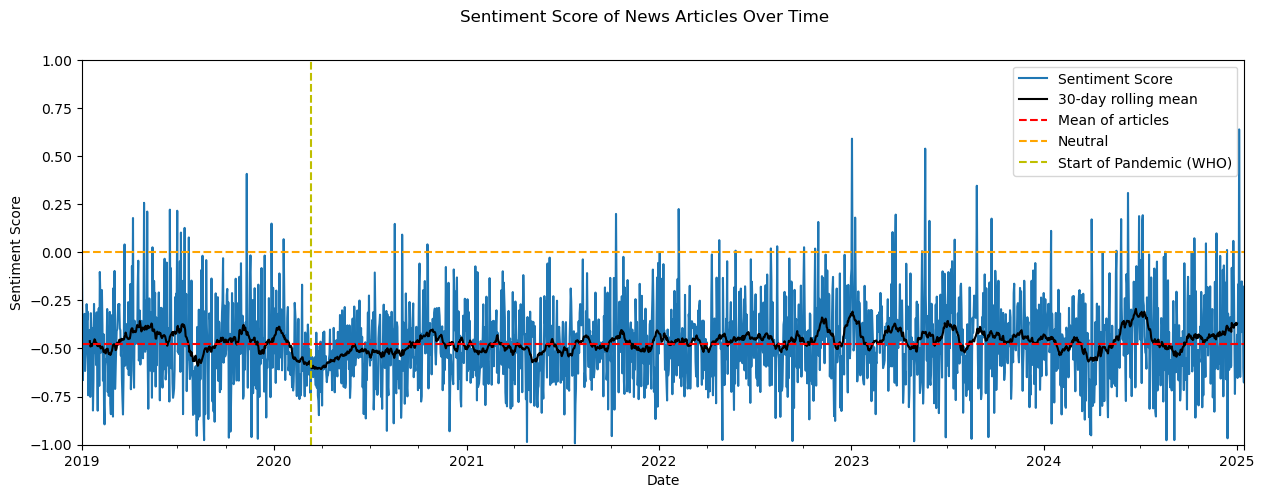

In [66]:
# Create figure
fig, ax = plt.subplots(figsize=(15, 5))
df.groupby(df['date'])["sentiment_score_signed"].mean().plot(kind='line', ax=ax, label='Sentiment Score')
df.groupby(df['date'])["sentiment_score_signed"].mean().rolling(window=30, center=True).mean().plot(kind='line', ax=ax, color='k', label='30-day rolling mean')
# add mean
ax.axhline(y=df['sentiment_score_signed'].mean(), color='r', linestyle='--', label='Mean of articles')
ax.axhline(y=0, color='orange', linestyle='--', label='Neutral')
ax.set_ylim(-1, 1)
# add a vertical line at the start of the pandemic as declared by WHO (11th March 2020)
ax.axvline(x='2020-03-11', color='y', linestyle='--', label='Start of Pandemic (WHO)')
# add legend
ax.legend()
# add title
fig.suptitle("Sentiment Score of News Articles Over Time")
# ad daxis labels
ax.set_ylabel("Sentiment Score")
ax.set_xlabel("Date")

Which countries received most media coverage during the pandemic?

In [28]:
from analysis import compare_occurence

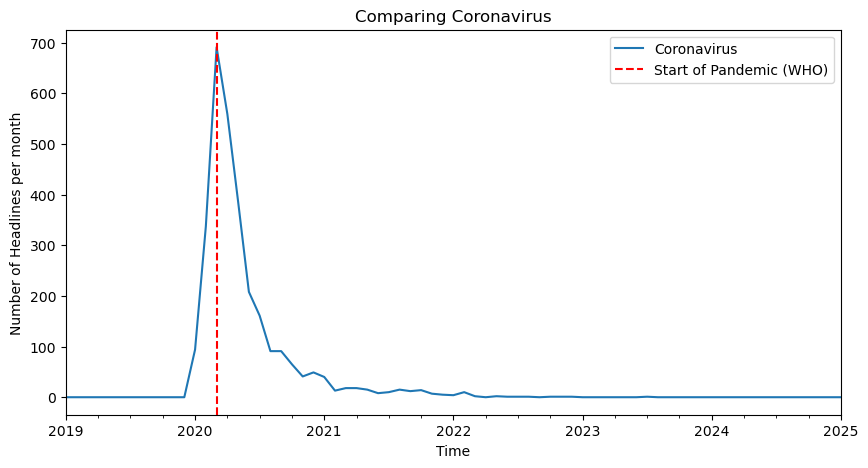

In [129]:
fig, ax = compare_occurence(df, "Coronavirus")
fig.set_size_inches(10, 5)
ax.axvline(x='2020-03-11', color='r', linestyle='--', label='Start of Pandemic (WHO)')
ax.legend()

In [119]:
countries_list = ["China", "Italy", "Spain"]# , "Austria", "Brazil", "South Africa"]
" ".join(countries_list)

'China Italy Spain'

In [120]:
countries_df = df[df["topics"].str.contains("|".join(countries_list), case=False, na=False)]

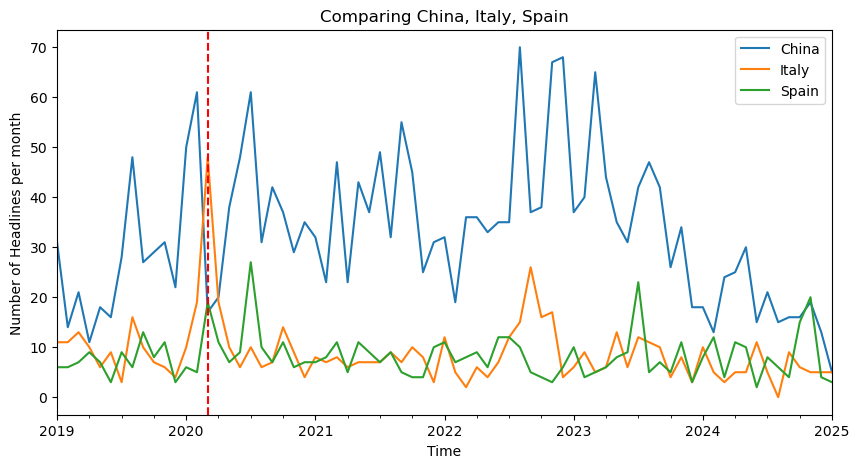

In [125]:
fig, ax = compare_occurence(countries_df, *countries_list)
fig.set_size_inches(10, 5)
ax.axvline(x='2020-03-11', color='r', linestyle='--', label='Start of Pandemic (WHO)')


## International (World News)

Which continents or geographic areas receive most media coverage from The Guardian?

In [131]:
geographic_areas = ["Africa", "Asia", "Europe", "America", "Middle East"]


Is there a change of attention to different geographic areas during the length of the dataset (2019-2024)?

(0.0, 50.0)

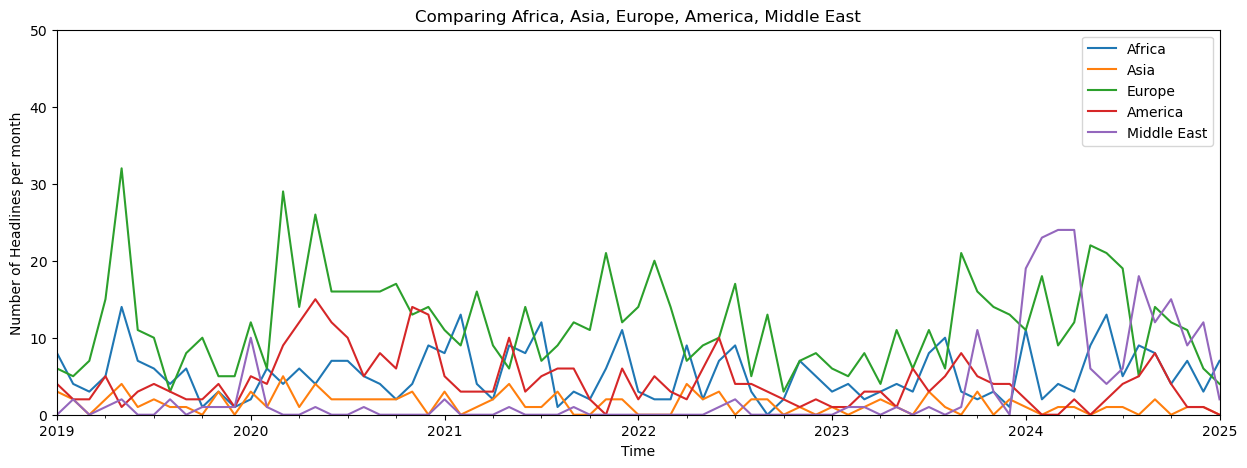

In [65]:
geographic_areas = ["Africa", "Asia", "Europe", "America", "Middle East"]

fig, ax = compare_occurence(df, *geographic_areas)
fig.set_size_inches(15, 5)
ax.legend(loc="upper right")
ax.set_ylim(0,50)

Which coverage do different armed conflicts receive? Are there any biases in the coverage based on the country of origin?

Text(0.5, 1.0, "Occurence of the word 'war' in the headlines")

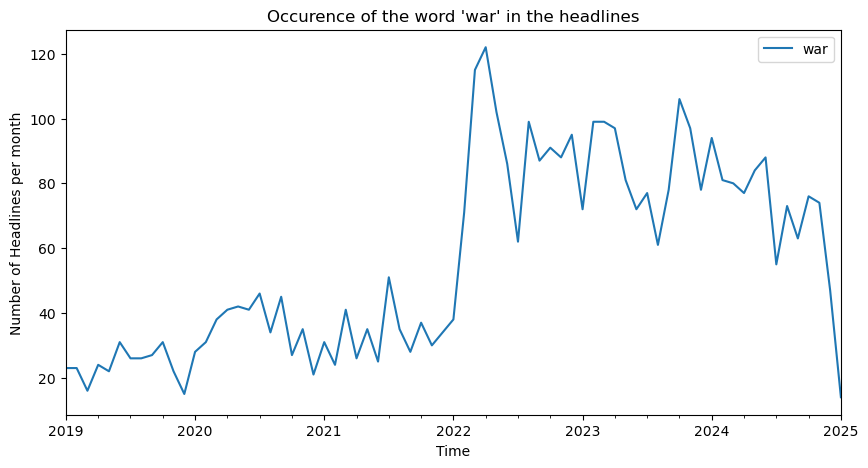

In [32]:
fig, ax = compare_occurence(df, "war")
fig.set_size_inches(10, 5)
plt.title("Occurence of the word 'war' in the headlines")



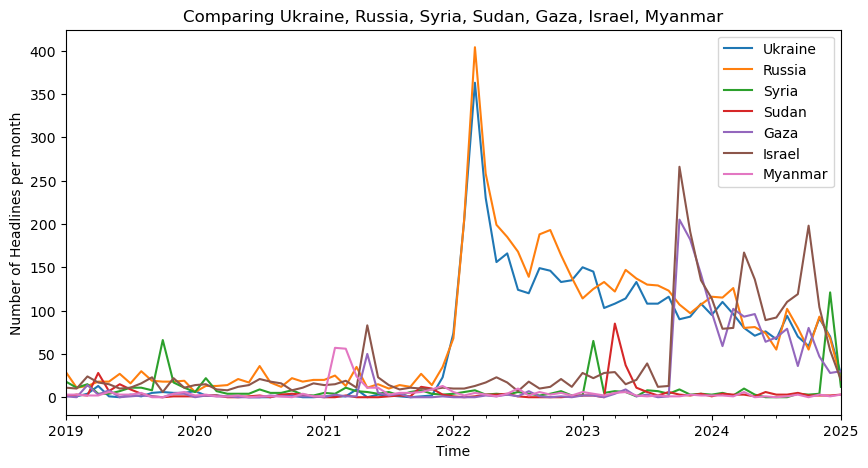

In [141]:
conflicts = ["Ukraine", "Russia", "Syria", "Sudan", "Gaza", "Israel", "Myanmar"]
fig, ax = compare_occurence(df, *conflicts)
fig.set_size_inches(10, 5)
#ax.legend(loc="upper right")

Which public figures do get most attention? Is there a temporal evolution?

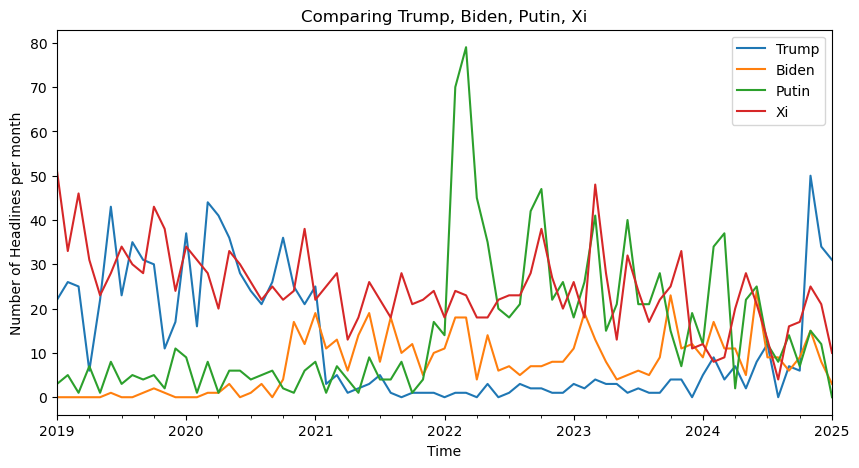

In [146]:
public_figures = ["Trump", "Biden", "Putin", "Xi"]
fig, ax = compare_occurence(df, *public_figures)
fig.set_size_inches(10, 5)

How much coverage did Brexit receive, and what was it's temporal evolution?

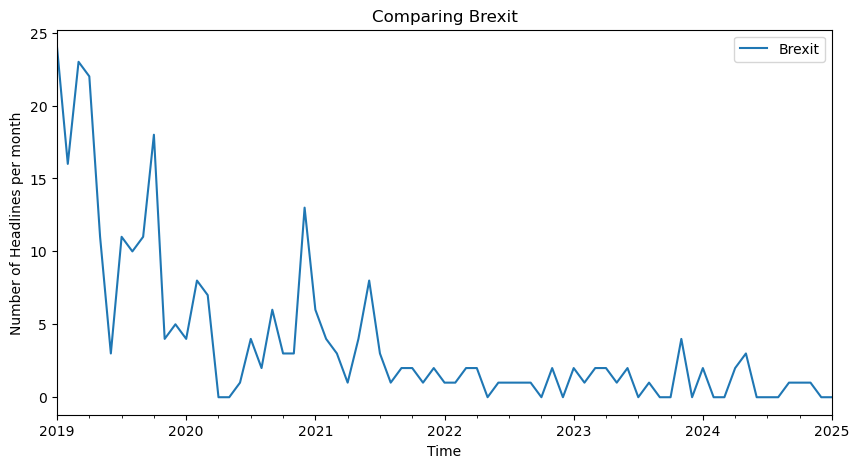

In [7]:
fig, ax = compare_occurence(df, "Brexit")
fig.set_size_inches(10, 5)

Is there a change in sentiment of headlines related to the war in Ukraine and Gaza?

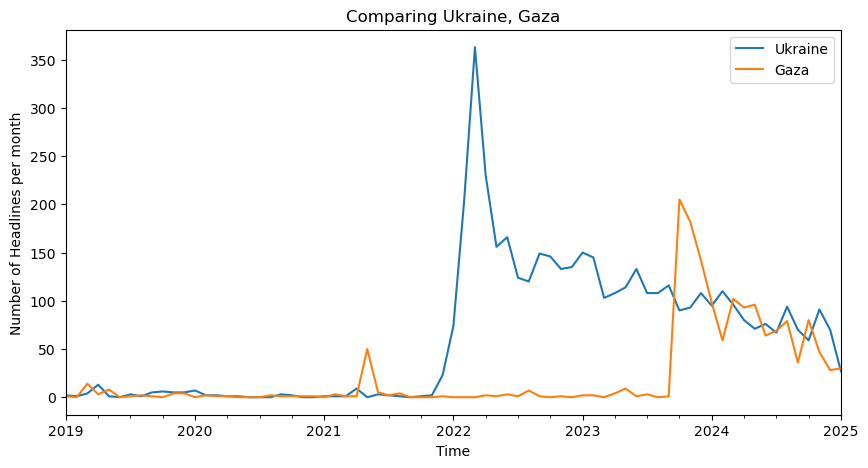

In [8]:
fig, ax = compare_occurence(df, "Ukraine", "Gaza")
fig.set_size_inches(10, 5)

Text(0.5, 0.98, 'Sentiment Score of News Articles on Ukraine Over Time')

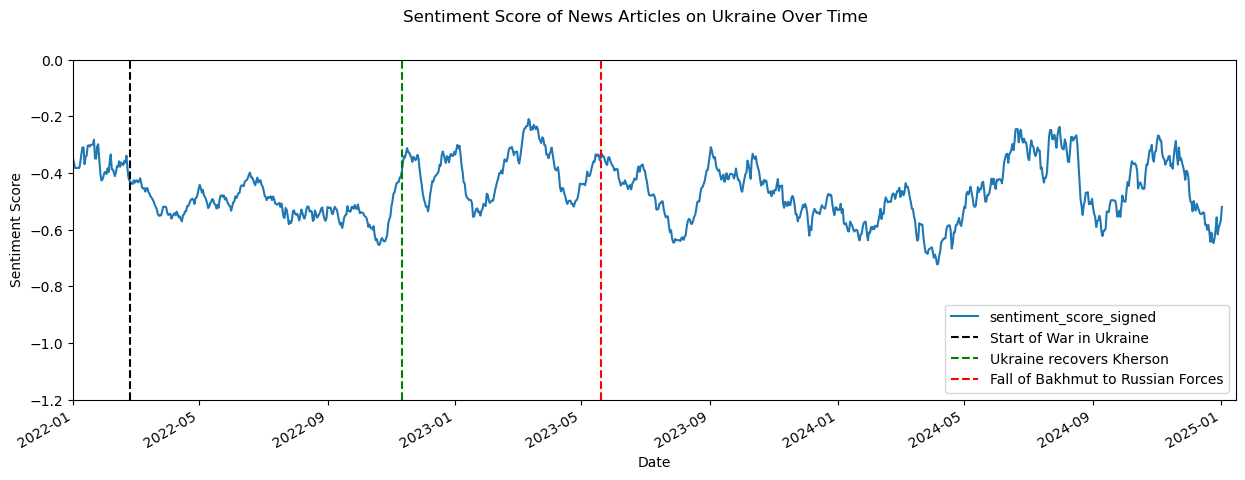

In [147]:
# Select entries related to Ukraine
ukraine_headlines = df[df["topics"].str.contains("Ukraine", case=False, na=False)]

sentiment_by_date = ukraine_headlines.groupby(by="date")["sentiment_score_signed"].mean()

# Apply a rolling window of 30 days to the sentiment scores
rolling_mean = sentiment_by_date.rolling(window=30, center=True).mean()


# Plot the rolling mean sentiment score
fig, ax = plt.subplots(figsize=(15, 5))

rolling_mean.plot(kind='line', ax=ax)
ax.axvline(x="2022-02-24", color='k', linestyle='--', label='Start of War in Ukraine')
ax.axvline(x="2022-11-11", color='g', linestyle='--', label='Ukraine recovers Kherson')
ax.axvline(x="2023-05-20", color='r', linestyle='--', label='Fall of Bakhmut to Russian Forces')
ax.legend(loc='lower right')
ax.set_ylim(-1.2, 0)
ax.set_xlim("2022-01-01", "2025-01-15")
# add labels
ax.set_ylabel("Sentiment Score")
ax.set_xlabel("Date")
# add title
fig.suptitle("Sentiment Score of News Articles on Ukraine Over Time")

Text(0.5, 0.98, 'Sentiment Score of News Articles on Gaza Over Time')

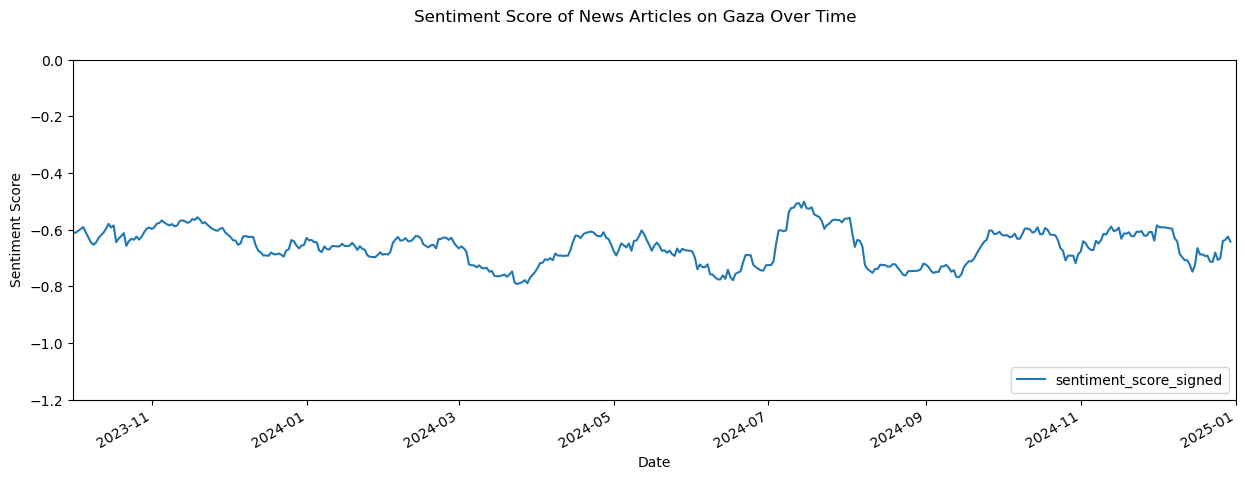

In [150]:
# Select entries related to Gaza
gaza_headlines = df[df["topics"].str.contains("Gaza", case=False, na=False)]

sentiment_by_date = gaza_headlines.groupby(by="date")["sentiment_score_signed"].mean()

# Apply a rolling window of 30 days to the sentiment scores
rolling_mean = sentiment_by_date.rolling(window=30, center=True).mean()


# Plot the rolling mean sentiment score
fig, ax = plt.subplots(figsize=(15, 5))

rolling_mean.plot(kind='line', ax=ax)
# ax.axvline(x="2022-02-24", color='k', linestyle='--', label='Start of War in Ukraine')
# ax.axvline(x="2022-11-11", color='g', linestyle='--', label='Ukraine recovers Kherson')
# ax.axvline(x="2023-05-20", color='r', linestyle='--', label='Fall of Bakhmut to Russian Forces')
ax.legend(loc='lower right')
# Set axis lims
ax.set_ylim(-1.2, 0)
ax.set_xlim("2023-10-01", "2025-01-01")
# add labels
ax.set_ylabel("Sentiment Score")
ax.set_xlabel("Date")

# add title
fig.suptitle("Sentiment Score of News Articles on Gaza Over Time")

Text(0.5, 0.98, 'Sentiment Score of News Articles on Israel Over Time')

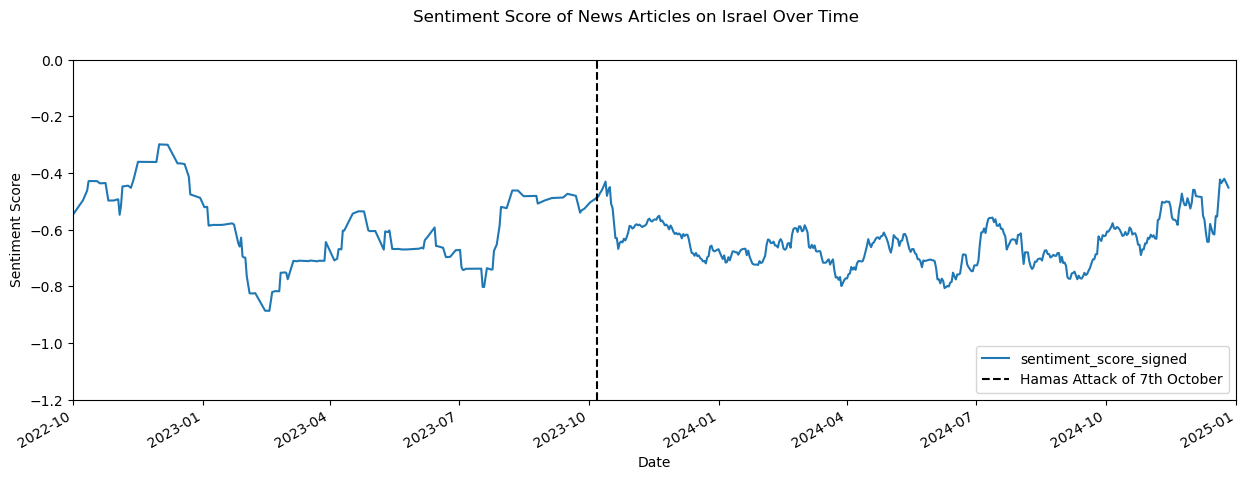

In [36]:
# Select entries related to israel
israel_headlines = df[df["topics"].str.contains("Israel", case=False, na=False)]

sentiment_by_date = israel_headlines.groupby(by="date")["sentiment_score_signed"].mean()

# Apply a rolling window of 30 days to the sentiment scores
rolling_mean = sentiment_by_date.rolling(window=30, center=True).mean()


# Plot the rolling mean sentiment score
fig, ax = plt.subplots(figsize=(15, 5))

rolling_mean.plot(kind='line', ax=ax)
ax.axvline(x="2023-10-07", color='k', linestyle='--', label='Hamas Attack of 7th October')
# ax.axvline(x="2022-11-11", color='g', linestyle='--', label='Ukraine recovers Kherson')
# ax.axvline(x="2023-05-20", color='r', linestyle='--', label='Fall of Bakhmut to Russian Forces')
ax.legend(loc='lower right')
# Set axis lims
ax.set_ylim(-1.2, 0)
ax.set_xlim("2022-10-01", "2025-01-01")
# add labels
ax.set_ylabel("Sentiment Score")
ax.set_xlabel("Date")

# add title
fig.suptitle("Sentiment Score of News Articles on Israel Over Time")

## Authors

In [73]:
# Rank the authors that have more negative sentiments in their headlines


In [37]:
# Filter for authors with more than 10 headlines
df_authors = df.groupby('authors').agg({'headline': 'count', 'sentiment_score_signed': 'mean', 'gender': 'first'}).reset_index()

In [46]:
df_authors

,authors,headline,sentiment_score_signed,gender
0,Aaron Smith,2,-0.041178,male
1,Aaron Walawalkar,38,-0.789075,male
2,Abby Young-Powell,4,-0.488485,female
3,Achilleas Zavallis,5,0.136225,male
4,Ada Colau,1,0.996296,female
...,...,...,...,...
1574,Zainab Haji,1,-0.938751,female
1575,Zeinab Mohammed Salih,71,-0.756928,female
1576,Zoe Williams,25,-0.512590,female
1577,Zoe Wood,10,-0.575751,female


In [47]:
# Display authors with more than X articles
minimum_articles = 10
df_authors[df_authors['headline'] > minimum_articles].sort_values(by='headline', ascending=False)

,authors,headline,sentiment_score_signed,gender
1197,Patrick Wintour,1539,-0.502361,male
587,Helen Davidson,1010,-0.541456,female
127,Angela Giuffrida,992,-0.398475,female
745,Jon Henley,938,-0.402916,male
797,Justin McCurry,865,-0.430584,male
...,...,...,...,...
784,Julia Carrie Wong,11,-0.476039,female
1206,Paul Lewis,11,-0.368981,male
1443,Stephanie Convery,11,-0.784720,female
1517,Tom Burgis,11,0.136591,male


In [55]:
positive_authors = df_authors[df_authors['headline'] > minimum_articles].sort_values(by='sentiment_score_signed', ascending=False).head(10)
positive_authors

,authors,headline,sentiment_score_signed,gender
280,Chris Moran,25,0.993800,mostly_male
710,Jim Powell,11,0.935564,male
1017,Matt Fidler,59,0.758638,male
553,Guy Lane,27,0.684759,male
1404,Seán Clarke,17,0.525110,male
1309,Richard Nelsson,76,0.332640,male
1249,Philip McKibbin,11,0.276803,male
271,Charlotte Higgins,33,0.249688,female
1454,Stephen Moss,13,0.206473,male
315,Constance Malleret,46,0.185191,female


In [56]:
negative_authors = df_authors[df_authors['headline'] > minimum_articles].sort_values(by='sentiment_score_signed', ascending=True).head(10)
negative_authors

,authors,headline,sentiment_score_signed,gender
1410,Sheldon Chanel,12,-0.989749,male
994,Mark Sweney,14,-0.986823,male
1386,Sarah Haque,16,-0.950266,female
298,Christy Choi,12,-0.939456,female
579,Harry Davies,23,-0.902216,male
585,Hazem Balousha,13,-0.855782,male
1041,Melissa Davey,112,-0.855244,female
27,Akhtar Mohammad Makoii,29,-0.841690,male
42,Alex Hern,63,-0.838264,male
316,Coral Murphy Marcos,12,-0.831232,female


Text(0.5, 0.98, 'Gender Ratio of Top 10 Most Positive and Negative Authors')

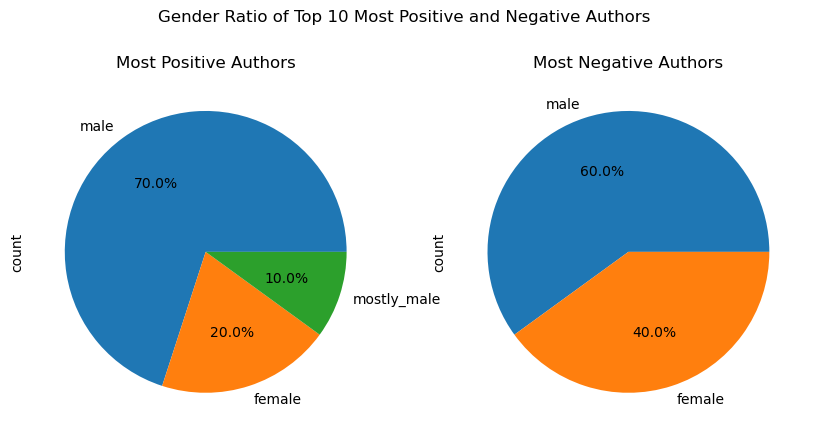

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
positive_authors["gender"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1)
ax1.set_title("Most Positive Authors")
negative_authors["gender"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2)
ax2.set_title("Most Negative Authors")
fig.suptitle("Gender Ratio of Top 10 Most Positive and Negative Authors")